# Class 11: API

In [56]:
import pandas as pd
import numpy as np
import requests
import json 
import matplotlib.pyplot as plt
from dotenv import load_dotenv
from langchain_groq import ChatGroq
import os

In [ ]:
# Comando curl en bash es para comunicarnos con la API, se comunica a traves de la direccion (url) y los argumentos, por ejemplo:
#curl "https://api.open-meteo.com/v1/forecast?latitude=52.52&longitude=13.41&current=temperature_2m,wind_speed_10m&hourly=temperature_2m,relative_humidity_2m,wind_speed_10m"
# En esa url la primer parte es la direccion y la segunda parte son los argumentos (temperatura que se da por la latitud y longitud de la ciuidad)
# El formato de repsuesta de la comunicacion de una API es el formato JSON, se puede traducir a un diccionario 
# Los archivos .env dentro de un archivo oculto para proteger datos sensibles 

In [ ]:
# Crear diccionario con Name, Lastname, Siblings, Hobbies
mi_diccionario = {"name":"Luis",
                  "lastname":"Alpizar",
                  "siblings": 1,
                  "hobbies":["reading", "watch movies", "play the guitar"]}
print(mi_diccionario)

{'name': 'Esteban', 'lastname': 'Cordova', 'siblings': 1, 'hobbies': ['reading', 'watch movies', 'play the guitar']}


In [9]:
json.dumps(mi_diccionario)

'{"name": "Esteban", "lastname": "Cordova", "siblings": 1, "hobbies": ["reading", "watch movies", "play the guitar"]}'

In [10]:
json.dumps(mi_diccionario, sort_keys=True) #Convertir diccionario a JSON

'{"hobbies": ["reading", "watch movies", "play the guitar"], "lastname": "Cordova", "name": "Esteban", "siblings": 1}'

In [11]:
result = '{"name":"John", "lastname":"Connor", "siblings":0}' #Respuesta JSON
result_dict = json.loads(result)
result_dict

{'name': 'John', 'lastname': 'Connor', 'siblings': 0}

In [12]:
url = "https://api.open-meteo.com/v1/forecast"
params = {
    "latitude":52.52,
    "longitude":13.41,
    "current":"temperature_2m,wind_speed_10m",
    "hourly":"temperature_2m,relative_humidity_2m,wind_speed_10m"
}

In [14]:
api_call = requests.get(url, params=params)
api_call

<Response [200]>

In [15]:
if api_call.status_code==200:
    data = api_call.json()
    print(data)
else: 
    print(f"Failed: {api_call.status_code}")

{'latitude': 52.52, 'longitude': 13.419998, 'generationtime_ms': 0.11038780212402344, 'utc_offset_seconds': 0, 'timezone': 'GMT', 'timezone_abbreviation': 'GMT', 'elevation': 38.0, 'current_units': {'time': 'iso8601', 'interval': 'seconds', 'temperature_2m': '°C', 'wind_speed_10m': 'km/h'}, 'current': {'time': '2025-01-28T02:00', 'interval': 900, 'temperature_2m': 7.6, 'wind_speed_10m': 10.3}, 'hourly_units': {'time': 'iso8601', 'temperature_2m': '°C', 'relative_humidity_2m': '%', 'wind_speed_10m': 'km/h'}, 'hourly': {'time': ['2025-01-28T00:00', '2025-01-28T01:00', '2025-01-28T02:00', '2025-01-28T03:00', '2025-01-28T04:00', '2025-01-28T05:00', '2025-01-28T06:00', '2025-01-28T07:00', '2025-01-28T08:00', '2025-01-28T09:00', '2025-01-28T10:00', '2025-01-28T11:00', '2025-01-28T12:00', '2025-01-28T13:00', '2025-01-28T14:00', '2025-01-28T15:00', '2025-01-28T16:00', '2025-01-28T17:00', '2025-01-28T18:00', '2025-01-28T19:00', '2025-01-28T20:00', '2025-01-28T21:00', '2025-01-28T22:00', '2025-0

In [16]:
type(data)

dict

In [19]:
#Traer "latitud"
data["latitude"]


52.52

In [20]:
#Traer lista "hourly"
data["hourly"]


{'time': ['2025-01-28T00:00',
  '2025-01-28T01:00',
  '2025-01-28T02:00',
  '2025-01-28T03:00',
  '2025-01-28T04:00',
  '2025-01-28T05:00',
  '2025-01-28T06:00',
  '2025-01-28T07:00',
  '2025-01-28T08:00',
  '2025-01-28T09:00',
  '2025-01-28T10:00',
  '2025-01-28T11:00',
  '2025-01-28T12:00',
  '2025-01-28T13:00',
  '2025-01-28T14:00',
  '2025-01-28T15:00',
  '2025-01-28T16:00',
  '2025-01-28T17:00',
  '2025-01-28T18:00',
  '2025-01-28T19:00',
  '2025-01-28T20:00',
  '2025-01-28T21:00',
  '2025-01-28T22:00',
  '2025-01-28T23:00',
  '2025-01-29T00:00',
  '2025-01-29T01:00',
  '2025-01-29T02:00',
  '2025-01-29T03:00',
  '2025-01-29T04:00',
  '2025-01-29T05:00',
  '2025-01-29T06:00',
  '2025-01-29T07:00',
  '2025-01-29T08:00',
  '2025-01-29T09:00',
  '2025-01-29T10:00',
  '2025-01-29T11:00',
  '2025-01-29T12:00',
  '2025-01-29T13:00',
  '2025-01-29T14:00',
  '2025-01-29T15:00',
  '2025-01-29T16:00',
  '2025-01-29T17:00',
  '2025-01-29T18:00',
  '2025-01-29T19:00',
  '2025-01-29T20:00',
  

In [21]:
df = pd.DataFrame(data["hourly"])
df

,time,temperature_2m,relative_humidity_2m,wind_speed_10m
0,2025-01-28T00:00,8.4,86,11.4
1,2025-01-28T01:00,7.9,86,8.4
2,2025-01-28T02:00,7.5,86,10.3
3,2025-01-28T03:00,6.9,88,9.7
4,2025-01-28T04:00,6.7,89,9.4
...,...,...,...,...
163,2025-02-03T19:00,0.7,76,4.6
164,2025-02-03T20:00,0.6,78,5.9
165,2025-02-03T21:00,0.5,79,6.9
166,2025-02-03T22:00,0.4,79,7.9


Text(0, 0.5, 'Temperatura (°C)')

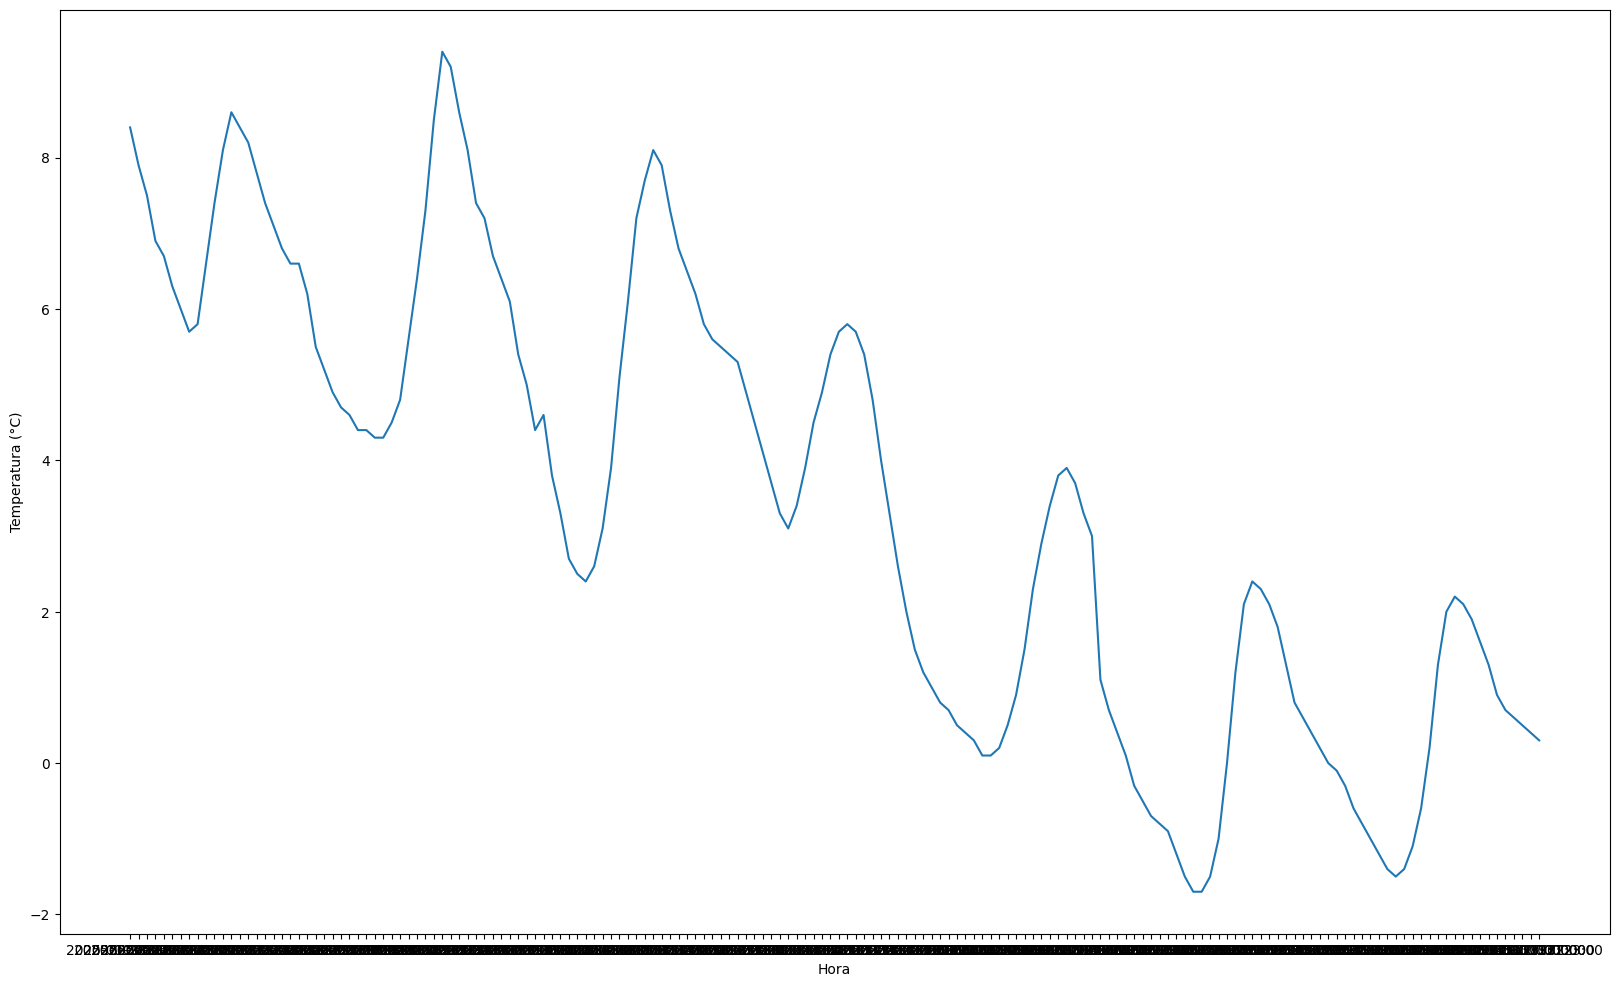

In [48]:
# graficar los datos restantes en matplotlib, que sea legible hint: girar 90 grados la fecha
plt.figure(figsize=(20, 12))
plt.plot(df["time"], df["temperature_2m"], label="Temperatura (°C)", color="tab:blue")
plt.xlabel("Hora")
plt.ylabel("Temperatura (°C)")



In [51]:
load_dotenv()

True

In [52]:
llm = ChatGroq(model_name="llama3-8b-8192")

In [54]:
message = [
    ("system","you are a helpful assistant that translates English to Spanish. Translate the user sentence "), 
    ("human", "I love programming in Python")
]

In [55]:
msg_llm = llm.invoke(message)
print(msg_llm)

content='Me encanta programar en Python.\n\n(Literally: "I love to program in Python")' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 36, 'total_tokens': 57, 'completion_time': 0.0175, 'prompt_time': 0.006760052, 'queue_time': 0.021451397, 'total_time': 0.024260052}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_6a6771ae9c', 'finish_reason': 'stop', 'logprobs': None} id='run-e6cdb7fa-c483-4312-af00-99e4cac03f76-0' usage_metadata={'input_tokens': 36, 'output_tokens': 21, 'total_tokens': 57}


In [60]:
url = "https://api.groq.com/openai/v1/chat/completions" #API endpoint
api_key = os.getenv("GROQ_API_KEY")
headers = {
    "Content-Type": "application/json",
    "Authorization": f"Bearer {api_key}"
}

data = {
    "model": "llama3-8b-8192",
    "messages": [
        {
            "role": "user",
            "content": "Who are the Beatles?"
        }
    ]
}
response = requests.post(url, headers=headers, json=data)
response

<Response [200]>

In [61]:
response_data = response.json()
print(response_data)

{'id': 'chatcmpl-9502a81b-3768-436d-9d41-214637cc67c3', 'object': 'chat.completion', 'created': 1738036861, 'model': 'llama3-8b-8192', 'choices': [{'index': 0, 'message': {'role': 'assistant', 'content': 'The Beatles! One of the most influential, successful, and beloved rock bands of all time.\n\nThe Beatles were a British rock band formed in Liverpool, England in 1960. The band consisted of four talented individuals:\n\n1. **John Lennon** (1940-1980): Rhythm guitar, keyboards, harmonica, and vocals. Known for his sharp wit, acerbic lyrics, and distinctive vocals.\n2. **Paul McCartney** (born 1942): Bass guitar, piano, keyboards, and vocals. Responsible for many of the band\'s most iconic songs and known for his melodic bass lines.\n3. **George Harrison** (1943-2001): Lead guitar, keyboards, and vocals. Known for his songwriting skills and his distinctive guitar playing style.\n4. **Ringo Starr** (born 1940): Drums and percussion. Famous for his charismatic stage presence, distinctive 